## Author: Paweł Jelonek <br> Date: 11.04.2021
### Machine learning course:<br> Lecture 2 - Data analysis, recognition and preparation.

In [1]:
import pandas as pd
import numpy as np
import string
from datetime import datetime
import statistics
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=(20, 10)

### 1.  Please download any dataset <br>
Trump tweets: https://www.kaggle.com/austinreese/trump-tweets

In [2]:
trump_tweets_df = pd.read_csv('C:/Users/pawst/OneDrive/Github/machine_learning_course/Lecture 2 - Data analysis, recognition and preparation/Lab4/trumptweets.csv')

### 2.	Identify the research motivation of the dataset:
    - field: Classification
    - problem: Get specific information based on Donald Trump tweets over a period of time.
    - type of ML: Classification

### 3.  Visualize the feature distributions by using histograms, spread distributions, or other plots.

In [3]:
trump_tweets_df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


### </br><center>Let's first see histograms and plots about retweets and favourites sections over a period of time.</center></br>

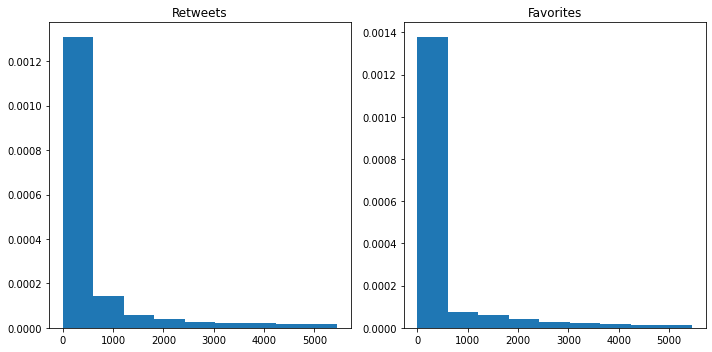

In [4]:
size = 10
binsRetweets = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
binsFavorites = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].hist(trump_tweets_df['retweets'], density=True, bins=binsRetweets)
axs[0].title.set_text('Retweets')

axs[1].hist(trump_tweets_df['favorites'], density=True, bins=binsFavorites)
axs[1].title.set_text('Favorites')

plt.show()

In [5]:
size = 10
binsRetweets = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
binsFavorites = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)

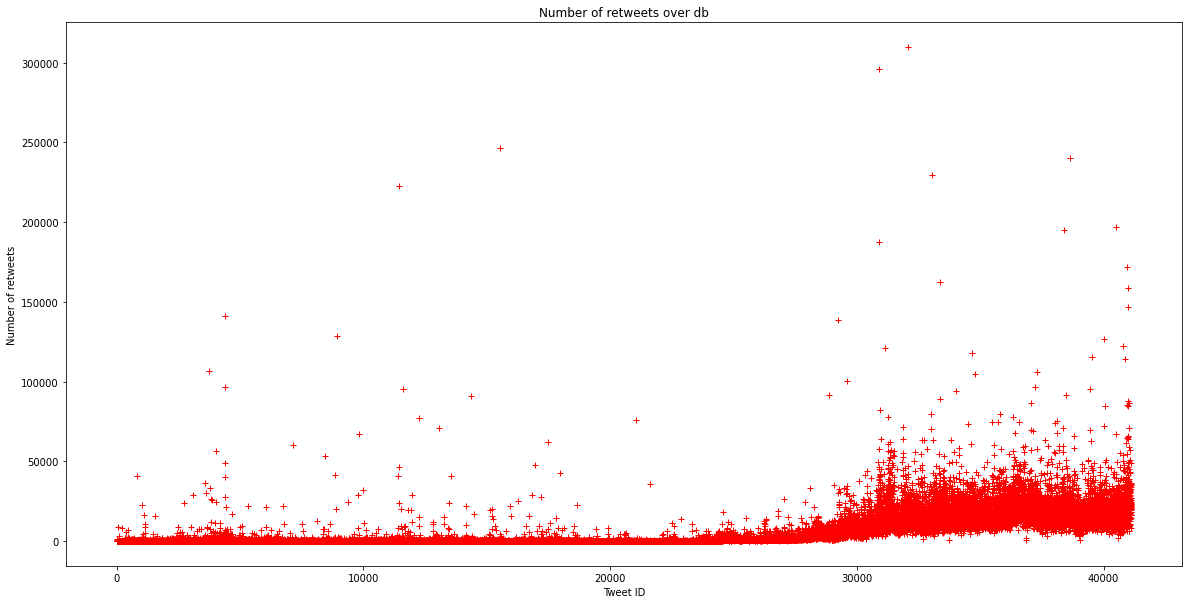

In [6]:
plt.plot(trump_tweets_df['retweets'], "r+")
plt.xlabel("Tweet ID")
plt.ylabel("Number of retweets")
plt.title("Number of retweets over db")
plt.show()

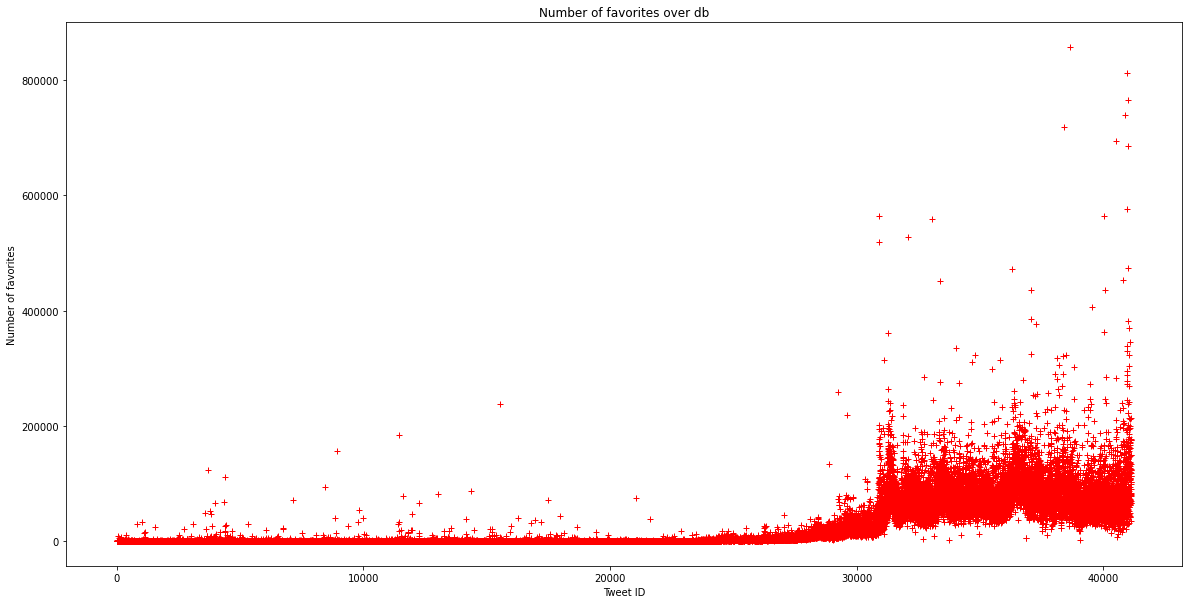

In [7]:
plt.plot(trump_tweets_df['favorites'], "r+")
plt.xlabel("Tweet ID")
plt.ylabel("Number of favorites")
plt.title("Number of favorites over db")
plt.show()
plt.show()

### Now I would like to see the frequency of posts over a period of time.

#### <center>We need to change date column to consist not string but a Date object.<center>

In [8]:
date_regex = '%Y-%m-%d %H:%M:%S'
def calculate_date_without_time(data: string):
    return datetime.strptime(data, date_regex)

In [9]:
trump_tweets_df['date'] = trump_tweets_df['date'].apply(calculate_date_without_time)
type(trump_tweets_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Now I can plot frequency of tweets

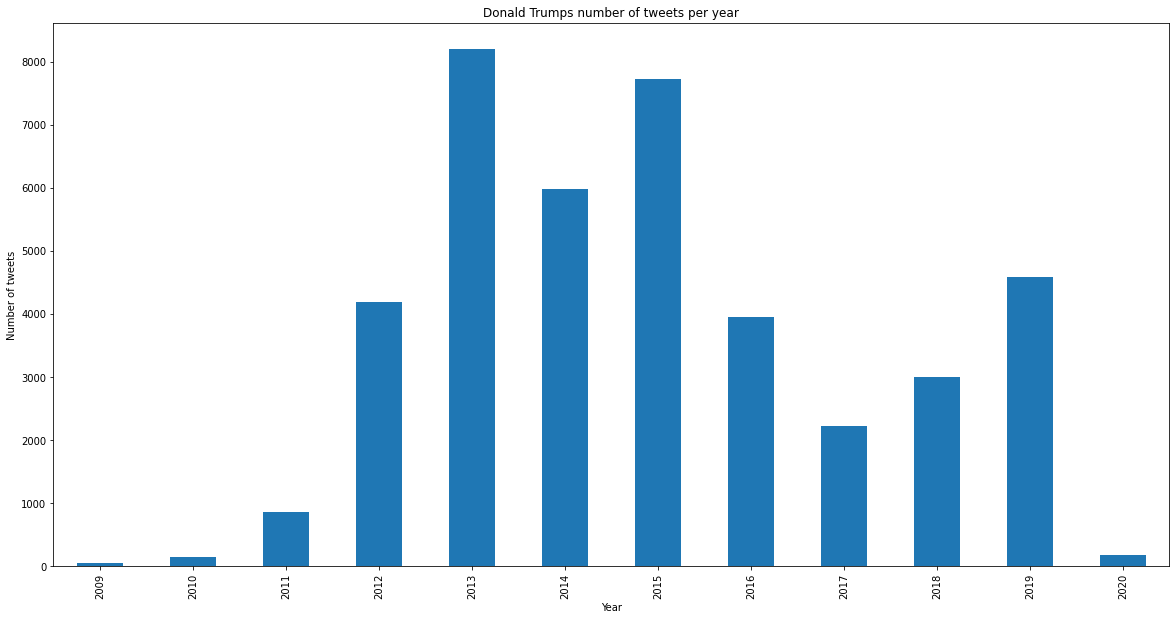

In [10]:
trump_tweets_df['date'].groupby(trump_tweets_df['date'].dt.year).count().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of tweets")
plt.title("Donald Trumps number of tweets per year")
plt.show()

### I also want to see a length of tweets

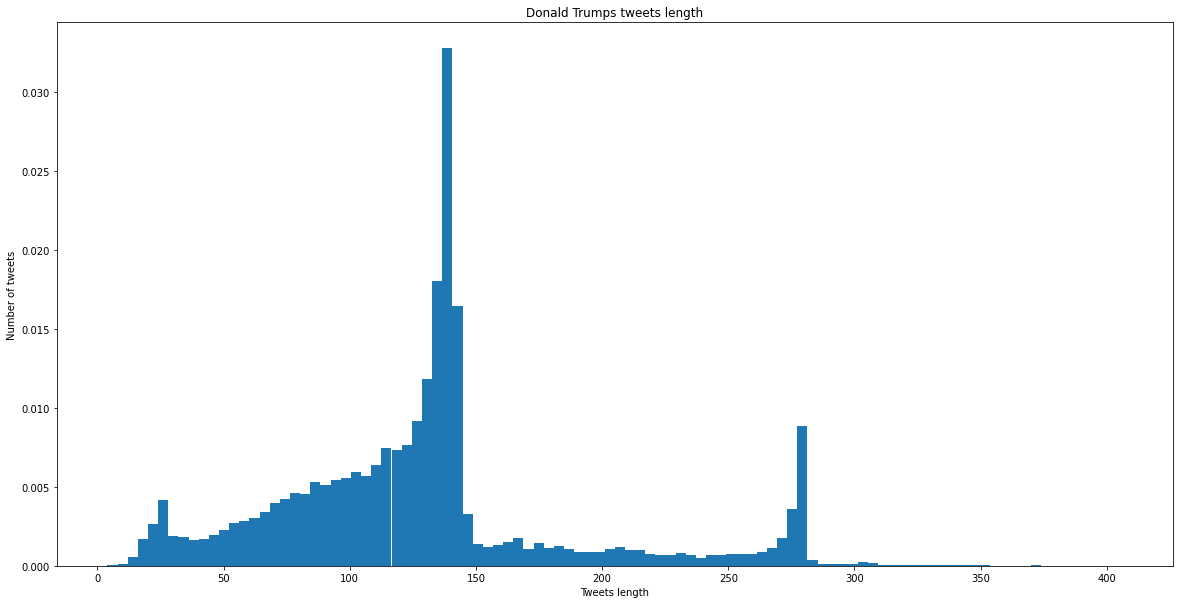

In [11]:
binsContent = 100
plt.hist(trump_tweets_df['content'].apply(lambda x: len(x)), density=True, bins=binsContent)
plt.xlabel("Tweets length")
plt.ylabel("Number of tweets")
plt.title("Donald Trumps tweets length")
plt.show()

### 4.	Określić wartości odstające (outliers).

### Firstly I will plot tweets which retweets values is 5 times bigger than the mean of a tweets year.

In [80]:
years_in_df = pd.Series(trump_tweets_df['date'].apply(lambda x: x.year).unique())
retweets_mean_dict = dict().fromkeys(years_in_df)

In [82]:
def fill_mean_value_dictionary(data: pd.DataFrame, dictionary: dict, row: string):
    for id, year in years_in_df.iteritems():
        get_records_for_year = data[data['date'].apply(lambda x: x.year == year)]
        dictionary[year] = statistics.mean(get_records_for_year[row])

In [83]:
for id, year in years_in_df.iteritems():
    get_all_records_for_year = trump_tweets_df[trump_tweets_df['date'].apply(lambda x: x.year == year)]
    retweets_mean_dict[year] = statistics.mean(get_all_records_for_year['retweets'])

print('Retweets mean per each year:')
retweets_mean_dict

Retweets mean per each year:


{2009: 69.44642857142857,
 2010: 186.76223776223776,
 2011: 276.9310344827586,
 2012: 520.11861575179,
 2013: 330.85548921652247,
 2014: 301.9976616001336,
 2015: 592.051301982122,
 2016: 6622.400404960769,
 2017: 16646.712365591397,
 2018: 18614.10106737825,
 2019: 19278.4435483871,
 2020: 28869.618784530387}

In [84]:
def get_mean_for_series(data: pd.Series, dictionary: dict):
    new_data = list()
    for index, value in data.items():
        new_data.append(5 * dictionary[value])
    return new_data


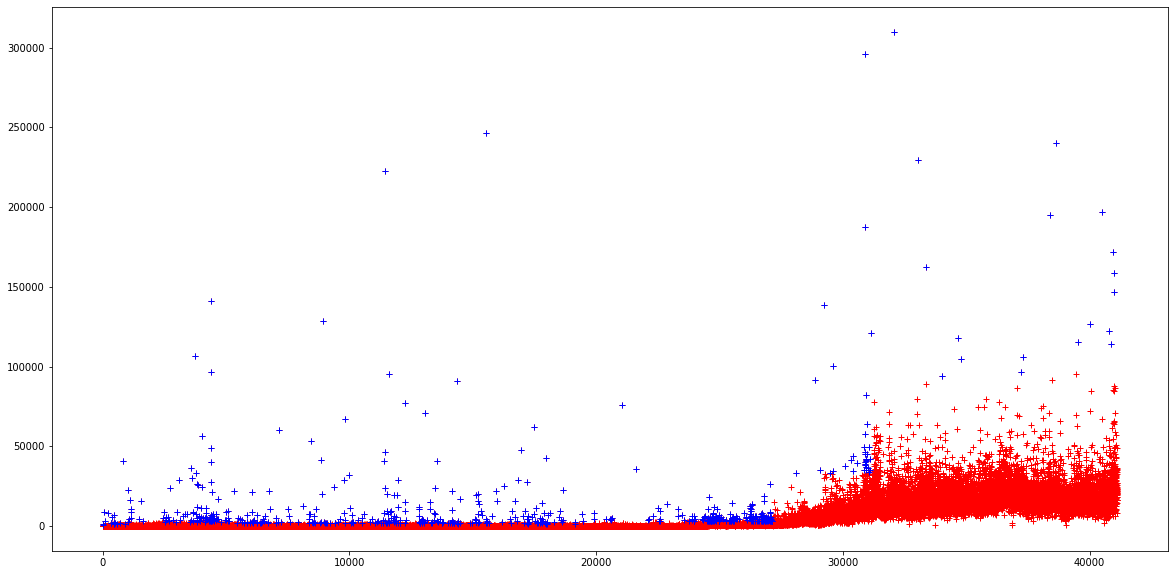

In [87]:
new_db = trump_tweets_df[trump_tweets_df.retweets >= get_mean_for_series(trump_tweets_df.date.dt.year, retweets_mean_dict)]

plt.plot(trump_tweets_df['retweets'], "r+")
plt.plot(new_db['retweets'], 'b+')
plt.show()

5.	Dla każdej cechy zebrać statystyki: średnia, wariancja, wartość najmniejsza/największa.


In [13]:
def get_statistics(data: pd.Series, title: string, function = None):
    if function is not None:
        new_data = data[title].apply(function)
    else: new_data = data[title]

    print('{}:'.format(title))
    print('Min: {} '.format(min(new_data)))
    print('Max: {} '.format(max(new_data)))
    print('Mean: {0:.2f} '.format(statistics.mean(new_data)))
    print('Standard deviation: {0:.2f} \n'.format(statistics.stdev(new_data)))

In [14]:
get_statistics(trump_tweets_df, 'favorites')
get_statistics(trump_tweets_df, 'retweets')
get_statistics(trump_tweets_df, 'content', lambda x: len(x))

favorites:
Min: 0 
Max: 857678 
Mean: 22356.90 
Standard deviation: 41501.86 

retweets:
Min: 0 
Max: 309892 
Mean: 5455.59 
Standard deviation: 10130.08 

content:
Min: 4 
Max: 406 
Mean: 129.76 
Standard deviation: 60.54 



6.	Określić kowariancję/korelację cech.

<center>To focus on only related columns we will firstly delete id column </center>

In [15]:
del trump_tweets_df['id']
trump_tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags,geo
0,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [16]:
trump_tweets_df.cov()

,retweets,favorites,geo
retweets,1.026185e+08,3.970593e+08,NaN
favorites,3.970593e+08,1.722404e+09,NaN
geo,NaN,NaN,NaN


7.	Przeanalizować, które cechy są potencjalnie najlepsze do uczenia.

##### <center>content, date, retweets, favorites</center>

8.	W oparciu o powyższe wybrać do uczenia: określone klasy przypadków, wybrane cechy, oraz liczbę rekordów
 danych (wszystkie?). Przygotowany zbiór zapisać.

9.	Proszę pobrać zbiór danych, w którym są wartości brakujące (NaN/0/-/(puste miejsce)) lub usunąć ze zbioru danych
losowo pewną liczbę komórek.
    -	Wyznaczyć statystykę braków i ocenić jak ten problem rozwiązać.
    -	Obsłużyć wartości brakujące za pomocą usunięcia rekordów.
    -	Obsłużyć wartości brakujące wypełniając je zerem/inną wartością stałą.
    -	Obsłużyć wartości brakujące wypełniając wartością średnią cechy (wartości ciągłe) lub medianą (wartości dyskretne).


For the purpose of our motivation we do not need columns:
    - mentions
    - hashtags
    - geo
as they not only contain NaN values, but they are not related to the topic.

'link' column is also not needed as it has no usage here.

In [ ]:
# def get_all_nan_with_column_name(column_name: string, dataframe: pd.DataFrame):
#     return len(dataframe.loc[pd.isna(dataframe[column_name]) == True])

In [ ]:
# all_rows_from_df = len(trump_tweets_df)
# all_nan_mentions = get_all_nan_with_column_name('mentions', trump_tweets_df)
# all_nan_geo = get_all_nan_with_column_name('geo', trump_tweets_df)
# all_nan_hashtags = get_all_nan_with_column_name('hashtags', trump_tweets_df)

# print(f'Percentage of all NaN cells in column mentions is {(all_nan_mentions/all_rows_from_df)*100:.5} %')
# print(f'Percentage of all NaN cells in column geo is {(all_nan_geo/all_rows_from_df)*100:.5} %')
# print(f'Percentage of all NaN cells in column hashtags is {(all_nan_hashtags/all_rows_from_df)*100:.5} %')
#
# del trump_tweets_df['mentions']
# del trump_tweets_df['geo']
# del trump_tweets_df['hashtags']

# del trump_tweets_df['link']

# print("\n\nNew dataset:")
# trump_tweets_df.head()

10.	Przeprowadzić
    -	skalowanie każdej cechy w zadanym przedziale (domyślnie [-1,1]),
    -	normalizację każdej cechy (do rozkładu Gaussa N(0,1)).

11.	Zakodować etykiety klas
    -	problemy binarne: 0/1, -1/1,
    -	problemy wieloklasowe: kolejne cyfry, one-hot encoding.

